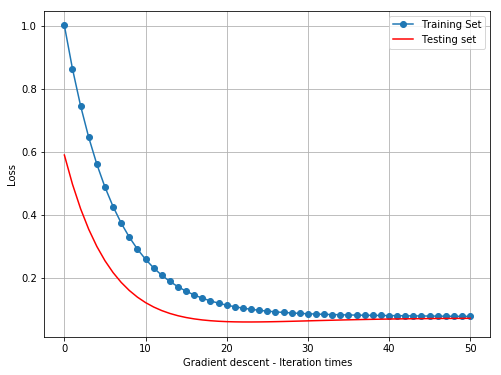

In [1]:

from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random

def get_data():
    data = load_svmlight_file("housing_scale.txt")
    return data[0], data[1]

def f(x, w, b):
    f_result = 0 #b
    x = np.ndarray.tolist(x)
    for i in range(len(x[0])):
        f_result += x[0][i] * w[i]   #y=wx+b
    f_result += b
    return f_result

def accuracy(w, b, x_test, y_test):
    x = np.ndarray.tolist(x_test)
    right_num = 0
    for i in range(len(x[0])):
        result = f(x_test[i, :], w, b)
        # print result
        if result > 0 and y_val[i] == 1 or result < 0 and y_test[i] == -1:
            right_num += 1
    return float(right_num) / float(len(x[0]))
#accuracy=correct/total


x,y=get_data()
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33,random_state=42)
#print(x)
#print(y)
b = random.random() #random
#w = np.random.rand(14)
w=np.random.rand(13)
lr=0.02
feature=13
x_train = x_train.todense()
x_test = x_test.todense()
x_train_len=len(x_train)
x_test_len=len(x_test)
loss = 1/(2*feature) * sum([(f(x_train[i,:],w,b) - y_train[i])**2 for i in range(feature)])

count = 0
train_loss = []
test_loss = []
while True:
    for i in range(feature):
        gradient_averange = sum([(f(x_train[k,:],w,b)-y_train[k])*x_train[k,i] for k in range (x_train_len)])/x_train_len
        w[i] -= gradient_averange * lr
    
    train_new_loss = 1/(2**feature) * sum([(f(x_train[i,:],w,b) - y_train[i])**2 for i in range(feature)])
    test_new_loss  = 1/(2**feature) * sum([(f(x_test[i,:],w,b) - y_test[i])**2 for i in range(feature)])
    if abs(loss - train_new_loss) > 0.00001:
        loss = train_new_loss
    else:
        break
    train_loss.append(loss)
    test_loss.append(test_new_loss)
    count += 1
    if count>50:
        break
plt.figure(figsize=(8,6))
plt.xlabel('Gradient descent - Iteration times')
plt.ylabel('Loss')
plt.plot(range(count), train_loss, 'o-', label=u"Training Set")
plt.plot(range(count), test_loss, 'r-', label=u"Testing set")
plt.legend()
plt.grid()
plt.show()


















